# Free Electron Energy Bands

#### Hasti Hojabr
#### Solid State Physics

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import random
from itertools import permutations
from itertools import product
from matplotlib import gridspec
warnings.filterwarnings("ignore")

## Miller Indices

In [200]:
def Family_of_Directions(h,k,l):

    listt = list(set(list(product(*((x, -x) for x in [h,k,l])))))
    # product使用举例
    # >>> from itertools import product
    # >>> # 创建两个可迭代对象
    # >>> list1 = [1, -1]
    # >>> list2 = [2, -2]
    # >>> list3 = [3, -3]
    # >>>
    # >>>
    # >>> # 使用 product 生成它们的笛卡尔积
    # >>> cartesian_product = list(product(list1, list2, list3))
    # >>>
    # >>> # 打印笛卡尔积
    # >>> print(cartesian_product)
    # >>> [(1, 2, 3), (1, 2, -3), (1, -2, 3), (1, -2, -3), (-1, 2, 3), (-1, 2, -3), (-1, -2, 3), (-1, -2, -3)]
    perm=[]
    for i in listt:
        Permutations = permutations(i,3)
        # >>> from itertools import permutations
        # >>> # 函数用于生成可迭代对象的所有可能排列
        # >>> # 创建一个列表作为可迭代对象
        # >>> elements = [1, 2, 3]
        # >>>
        # >>> # 使用 permutations 生成排列
        # >>> permutation_generator = permutations(elements,2)
        # >>>
        # >>> # 将生成的排列转换为列表并打印
        # >>> permutations_list = list(permutation_generator)
        # >>> print(permutations_list)
        # >>>
        # >>> [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
        perm =  perm + list(set(list(Permutations))) 
        
    millerr = [list(m) for m in list(set(list(perm)))]
    print('Number of family <{}{}{}>:'.format(h,k,l),len(millerr))
    index_name = [''.join(str(x) for x in m) for m in millerr]
    
    return millerr,index_name

In [201]:
# >>> from itertools import permutations
# >>> # 函数用于生成可迭代对象的所有可能排列
# >>> # 创建一个列表作为可迭代对象
# >>> elements = [1, 2, 3]
# >>>
# >>> # 使用 permutations 生成排列
# >>> permutation_generator = permutations(elements,2)
# >>>
# >>> # 将生成的排列转换为列表并打印
# >>> permutations_list = list(permutation_generator)
# >>> print(permutations_list)
# >>>
# >>> [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]


In [202]:
millerr,index_name = Family_of_Directions(1,1,0)
print('<110>:',index_name)

Number of family <110>: 12
<110>: ['0-1-1', '101', '-101', '0-11', '10-1', '-10-1', '110', '-1-10', '-110', '1-10', '01-1', '011']


In [203]:
def Miller(list):
    
    index_list=[] ; name_list=[]
    
    for l in list:
        h,k,l = map(int, l)
        index,name_index = Family_of_Directions(h,k,l)
        index_list+=index ; name_list+=name_index
        
    miller = dict(zip(name_list,index_list))
    return miller

miller = Miller(['000','100','110','200','220'])

Number of family <000>: 1
Number of family <100>: 6
Number of family <110>: 12
Number of family <200>: 6
Number of family <220>: 12


## Energy Bands

In [204]:
def Energy_fcc(miller,k1,k2,k3,lattice):
    energy =[]
    for h,k,l in np.array(list(miller.values())):
        
        if   lattice=='FCC': x1,x2,x3= -h+k+l , h-k+l , h+k-l  
        elif lattice=='BCC': x1,x2,x3= k+l , h+l , h+k  
        elif lattice=='SC' : x1,x2,x3= h,k,l
            
        E = (k1+x1)**2 +  (k2+x2)**2 + (k3+x3)**2 
        energy.append(E)
    return energy

In [205]:
def Band_Table(E,miller):
    """

    :param E: E[np.array[xxx, xxx, xxx]], E是一个列表，里面存储着一维的np.array
              E中元素的个数为字典miller中晶面的个数。
              一维np.array的大小取决于列表mu的长度。
    :param miller: miller: dict, 存储着指定晶相相应的晶面指数。
    :return:
    """
    key_list = list(miller.keys())
    val_list = list(miller.values())
    indices=[] ; En =[]
    for i in range(len(E)):
        hkl_list=[]
        for j in range(len(E)):
            # E[i] 是长度为 100 的 np.array
            # E[j] 是长度为 100 的 np.array
            if (E[i]==E[(j)]).all():
                position = val_list.index(list(val_list[j]))
                hkl_list.append(key_list[position])
        indices.append(hkl_list)
        En.append(E[i])
        
    df = pd.DataFrame(zip(indices,En),columns=['Indices','e(kx,ky,kz)'])
    df = df.loc[df.astype(str).drop_duplicates().index] ; En= df['e(kx,ky,kz)'].to_numpy()

    
    return indices,En,df


In [206]:
def Half_Reduced_Zones_Plot(En,mu):
    
    fig = plt.figure(figsize=[1.5,7])
    for e in En: plt.plot(mu,e)
    plt.yticks(np.arange(0,max(e)+1, 1))
    #plt.xlim(0,max(mu))
    plt.show
    
    
def Reduced_Zones_Plot(En,mu):
    
    fig = plt.figure(figsize=[3,10])
    muu = np.linspace(-max(mu),max(mu),len(mu)*2)

    for e in En: 
        ee = [x for x in list(e)[::-1]] +list(e)
        plt.plot(muu,ee)
    plt.yticks(np.arange(0,max(e)+1, 1))
    plt.xlim(-max(mu),max(mu))
    plt.show


In [207]:
def Plot_Table(df,mu,En,lattice_name,k_name):
    
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure(figsize=(10, 10)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[5,20]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    

    #Plot
    color = list(plt.cm.tab10(np.arange(10))) + ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]
    ax1.set_prop_cycle('color', color)
    
    maxx =max(En[0])
    for i in range(len(En)): 
        
        ax1.plot(mu,En[i],label=str(i))
        
        if max(En[i])>maxx: maxx=max(En[i])
        
    ax1.set_yticks(np.arange(0,maxx+1, 1))
    ax1.set_ylabel('ε/ε_x')
    ax1.set_xlabel('k ({})'.format(k_name))
    ax1.set_title(lattice_name)
    ax1.set_xlim(min(mu),max(mu))
    
    
    #table
    font_size = 14
    bbox = [0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText=df.values, rowLabels=df.index, bbox=bbox, colLabels=df.columns)
    
    
    lines_labels = [ax1.get_legend_handles_labels() for ax1 in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    colors=[l.get_color() for l in lines]

    for i in range(len(colors)):
        mpl_table[(i+1, -1)].set_facecolor(colors[i])

    plt.show()

## Examples

In [208]:
def main(miller,k1,k2,k3,mu,lattice_name,k_name,Display,Half_zone,zone_table):

    En             = Energy_fcc(miller,k1,k2,k3,lattice_name)
    print("En", En[0].shape)
    indices,En,df  = Band_Table(En,miller)

    if Half_zone     == True : Half_Reduced_Zones_Plot(En,mu)
    if Display       == True : display(df)
    if zone_table    == True :
        df1 = df['Indices'].to_frame()
        Plot_Table(df1,mu,En,lattice_name,k_name)

    return indices,En,df


Number of family <000>: 1
Number of family <100>: 6
Number of family <110>: 12


Number of family <000>: 1
Number of family <100>: 6
Number of family <110>: 12
Number of family <111>: 8
En (100,)


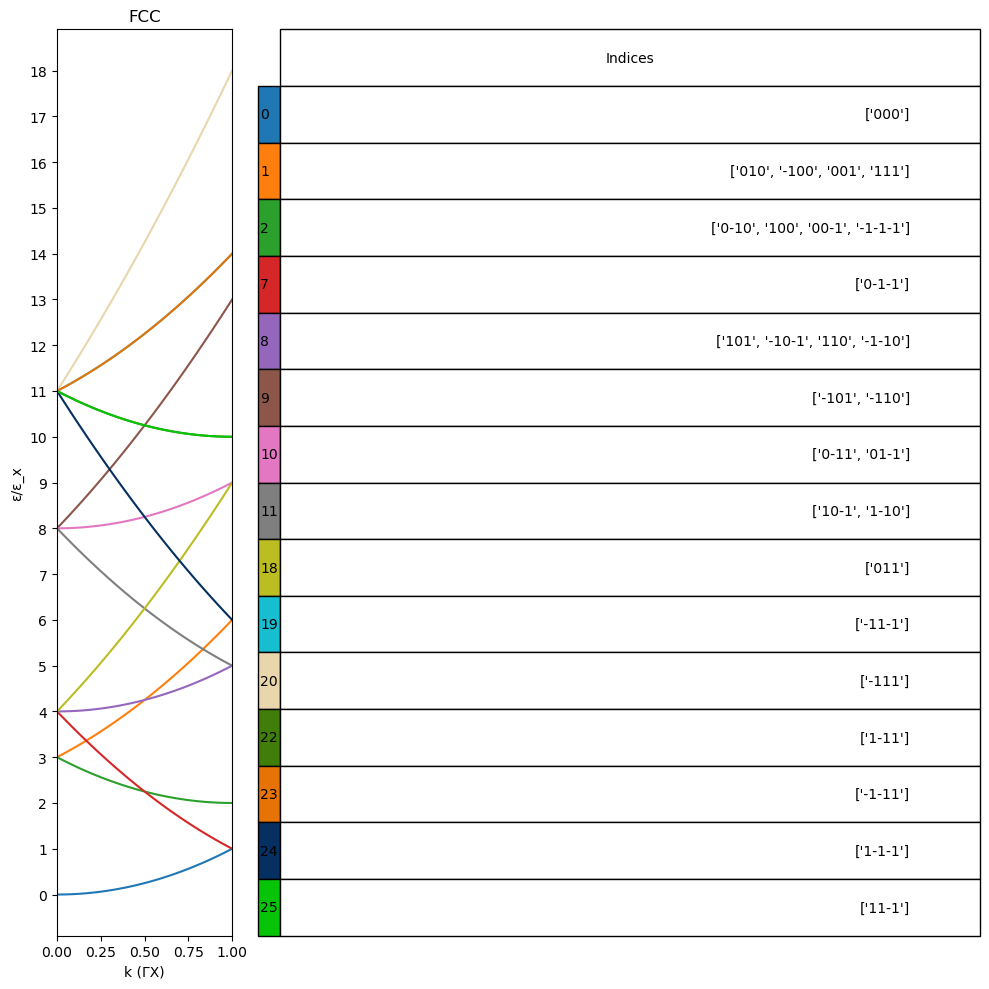

In [230]:
# ΓX - FCC
# miller = Miller(['000','100','110','111','200','220'])

miller = Miller(['000', '100', '110', '111'])
mu = np.linspace(0,1,100) # 0-1之间平均分成100份
indices_ΓX, En_ΓX, df_ΓX = main(miller=miller,
                                k1=1*mu,k2=0,k3=0,mu=mu,
                                lattice_name='FCC',k_name='ΓX',
                                Display=False,Half_zone=False, zone_table=True)


Number of family <000>: 1
Number of family <100>: 6
Number of family <110>: 12
En (100,)


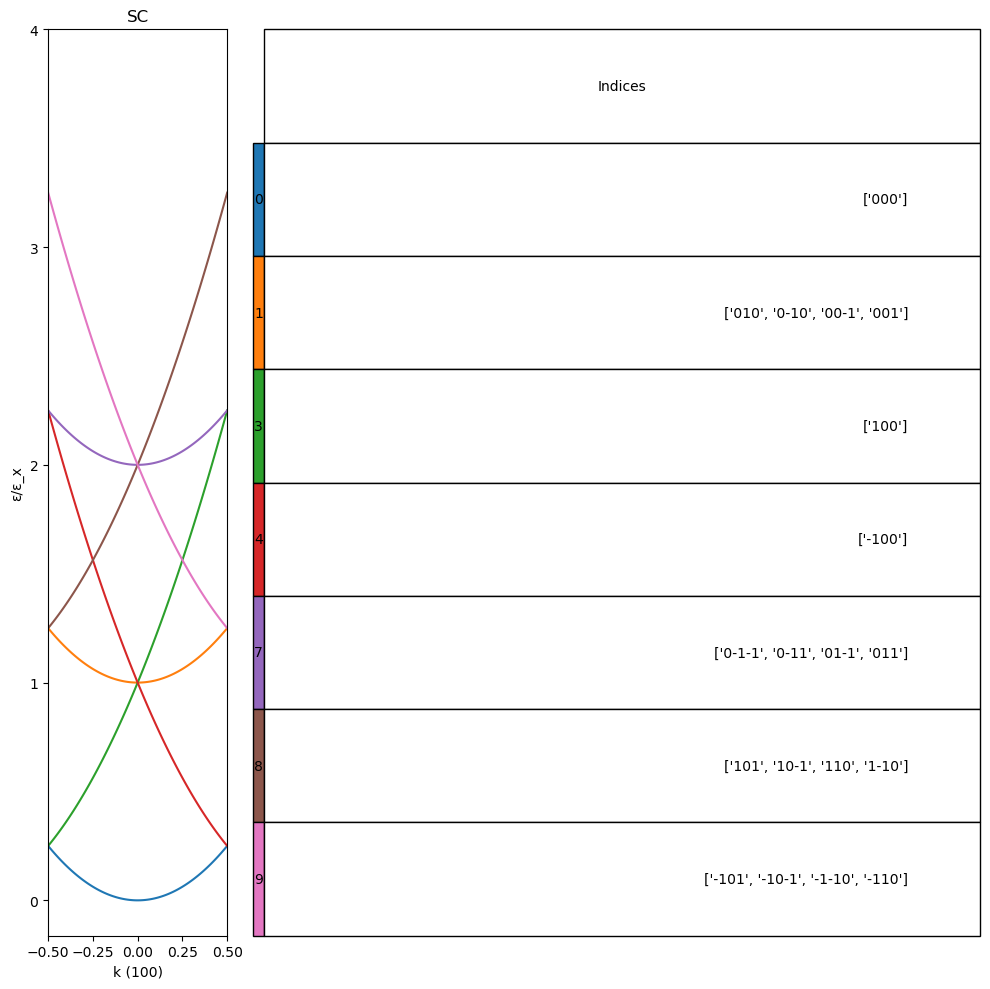

In [220]:
#100 - SC
miller = Miller(['000', '100', '110'])
mu = np.linspace(-1/2,1/2,100)
indices_sc, En_sc, df_sc = main(miller=miller,
                                k1=1*mu,k2=0,k3=0,mu=mu,
                                lattice_name='SC',k_name='100',
                                Display=False,Half_zone=False,zone_table=True)

Number of family <000>: 1
Number of family <100>: 6
En (200,)


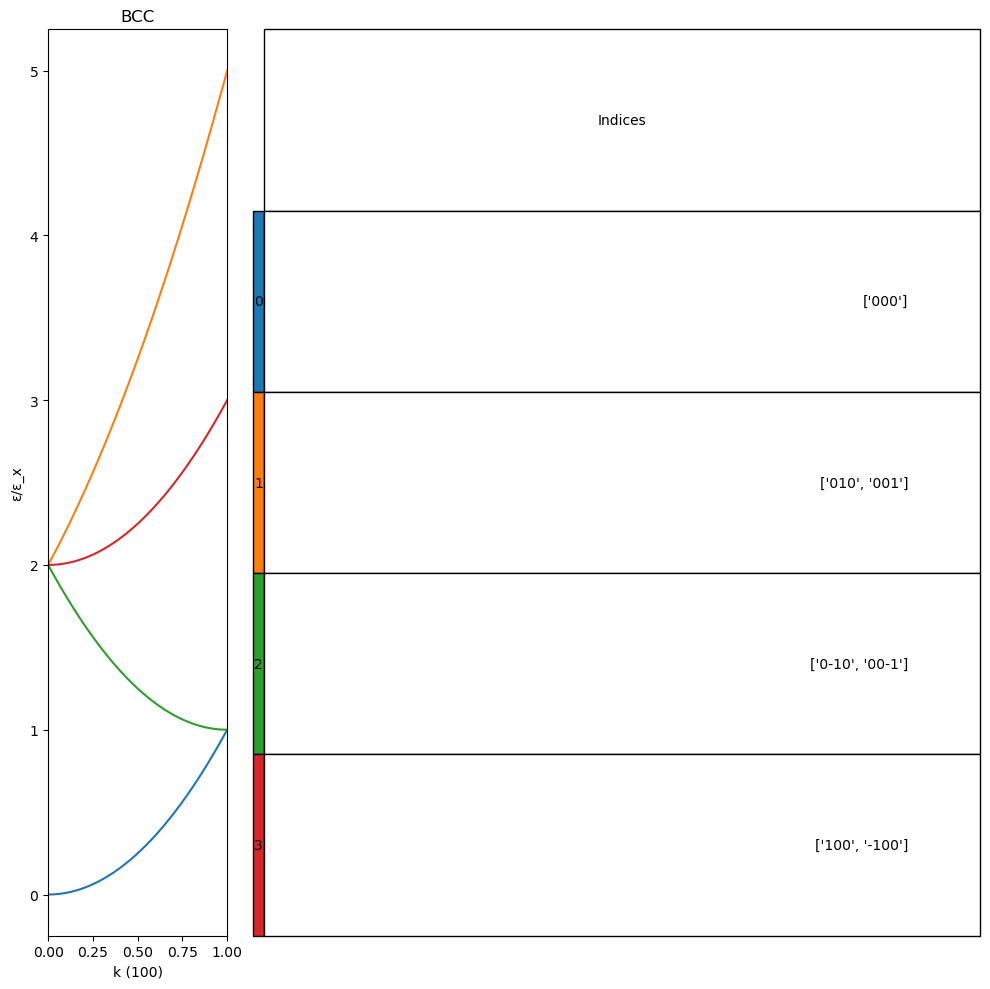

In [222]:
#100 - BCC
miller = Miller(['000', '100'])
mu = np.linspace(0,1,200)

indices_bcc, En_bcc, df_bcc = main(miller=miller,
                                k1=1*mu,k2=0,k3=0,mu=mu,
                                lattice_name='BCC',k_name='100',
                                Display=False,Half_zone=False,zone_table=True)


In [213]:
def Plot(En,mu,axis):
    for e in En: axis.plot(mu,e,color='k')

In [223]:
miller = Miller(['000','100','110','111','200','220'])

#XW - FCC
mu = np.linspace(0,1,100)
indices_XW, En_XW, df_XW = main(miller=miller,
                                k1=1, k2=mu/2, k3=0, mu=mu,
                                lattice_name='FCC',k_name='XW',
                                Display=False,Half_zone=False,zone_table=False)


#WL - FCC
mu = np.linspace(0,1,100)
indices_WL, En_WL, df_WL = main(miller=miller,
                                k1=1-(mu/2), k2=0.5, k3=mu/2, mu=mu,
                                lattice_name='FCC',k_name='WL',
                                Display=False,Half_zone=False,zone_table=False)

#LΓ - FCC
mu = np.linspace(-1/2,0,100)
indices_LΓ, En_LΓ, df_LΓ = main(miller=miller,
                                k1=1*mu,k2=1*mu,k3=1*mu,mu=mu,
                                lattice_name='FCC',k_name='ΓX',
                                Display=False,Half_zone=False,zone_table=False)


#ΓK - FCC
mu = np.linspace(0,3/4,100)
indices_ΓK, En_ΓK, df_ΓK = main(miller=miller,
                                k1=1*mu,k2=1*mu,k3=0,mu=mu,
                                lattice_name='FCC',k_name='ΓK',
                                Display=False,Half_zone=False,zone_table=False)

#KX - FCC
mu = np.linspace(0,1,100)
indices_KX, En_KX, df_KX = main(miller=miller,
                                k1=mu/4+3/4,k2=(1-mu)*(3/4),k3=0,mu=mu,
                                lattice_name='FCC',k_name='KX',
                                Display=False,Half_zone=False,zone_table=False)



Number of family <000>: 1
Number of family <100>: 6
Number of family <110>: 12
Number of family <111>: 8
Number of family <200>: 6
Number of family <220>: 12
En (100,)
En (100,)
En (100,)
En (100,)
En (100,)


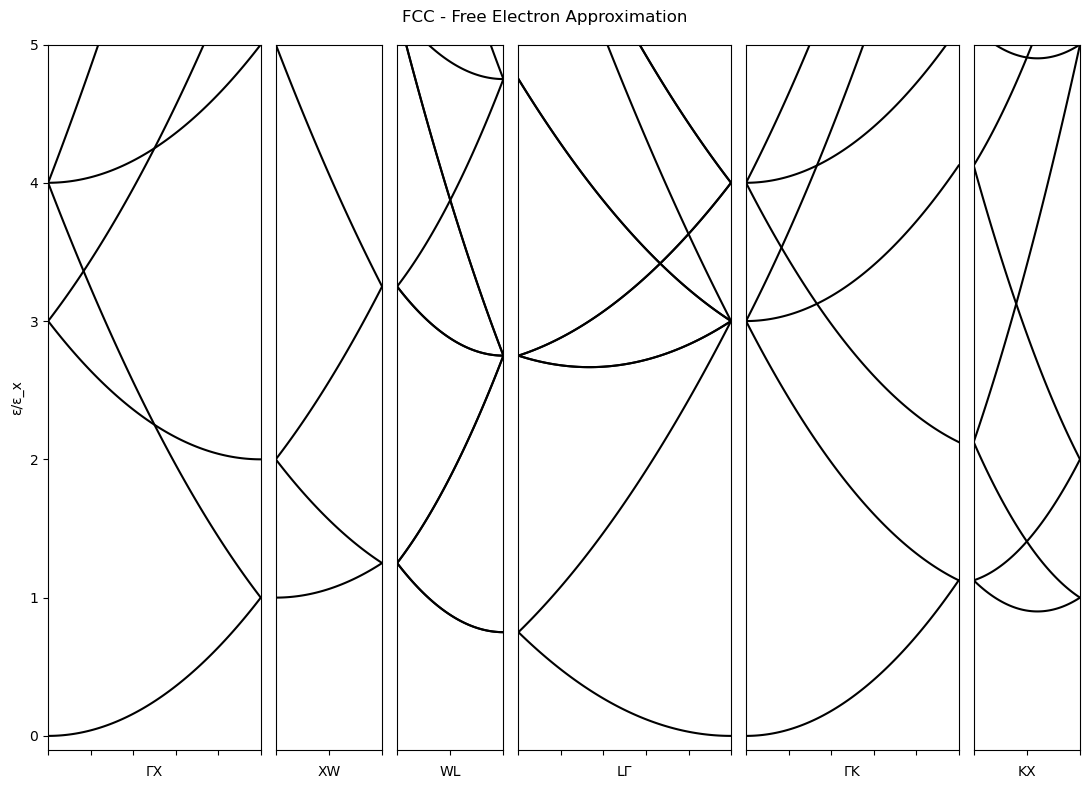

In [215]:
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as pl
import matplotlib.gridspec as gridspec

fig = pl.figure(figsize=(11, 8))

gs = gridspec.GridSpec(1, 6, width_ratios=[2, 1,1,2,2,1])


#ΓX
ax1=subplot(gs[0])
Plot(En_ΓX,np.linspace(0,1,100),ax1)
ax1.set_xticklabels(()) 
ax1.set_xlabel('ΓX')
ax1.set_ylabel('ε/ε_x')
plt.ylim( -0.1 ,5 ) ; plt.xlim(0,1)

#XW
ax=subplot(gs[1])

Plot(En_XW,np.linspace(0,1,100),ax)
ax.set_xlabel('XW')
plt.ylim( -0.1 ,5 ) ; plt.xlim(0,1); ax.set_xticklabels(()) ; ax.set_yticks([])

#WL
ax=subplot(gs[2])
Plot(En_WL,np.linspace(0,1,100),ax)
ax.set_xlabel('WL')
plt.ylim( -0.1 ,5 ) ; plt.xlim(0,1);ax.set_xticklabels(()) ; ax.set_yticks([])

#LΓ
ax=subplot(gs[3])
Plot(En_LΓ,np.linspace(-1/2,0,100),ax)
ax.set_xlabel('LΓ')
plt.ylim( -0.1 ,5 )  ; plt.xlim(-1/2,0);ax.set_xticklabels(()) ; ax.set_yticks([])

#ΓK
ax=subplot(gs[4])
Plot(En_ΓK,np.linspace(0,1,100),ax)
ax.set_xlabel('ΓK')
plt.ylim( -0.1 ,5 ) ; plt.xlim(0,1) ; ax.set_xticklabels(()) ; ax.set_yticks([])

#KX
ax=subplot(gs[5])
Plot(En_KX,np.linspace(0,1,100),ax)
ax.set_xlabel('KX')
plt.ylim( -0.1 ,5 ) ; plt.xlim(0,1) ; ax.set_xticklabels(()) ; ax.set_yticks([])

fig.suptitle('FCC - Free Electron Approximation')
fig.tight_layout(w_pad=-50,h_pad=-20)
plt.show()

Number of family <000>: 1
Number of family <100>: 6
Number of family <110>: 12
Number of family <111>: 8
Number of family <200>: 6
Number of family <220>: 12
Number of family <222>: 8
En (100,)
En (100,)
En (100,)
En (100,)
En (100,)
En (100,)


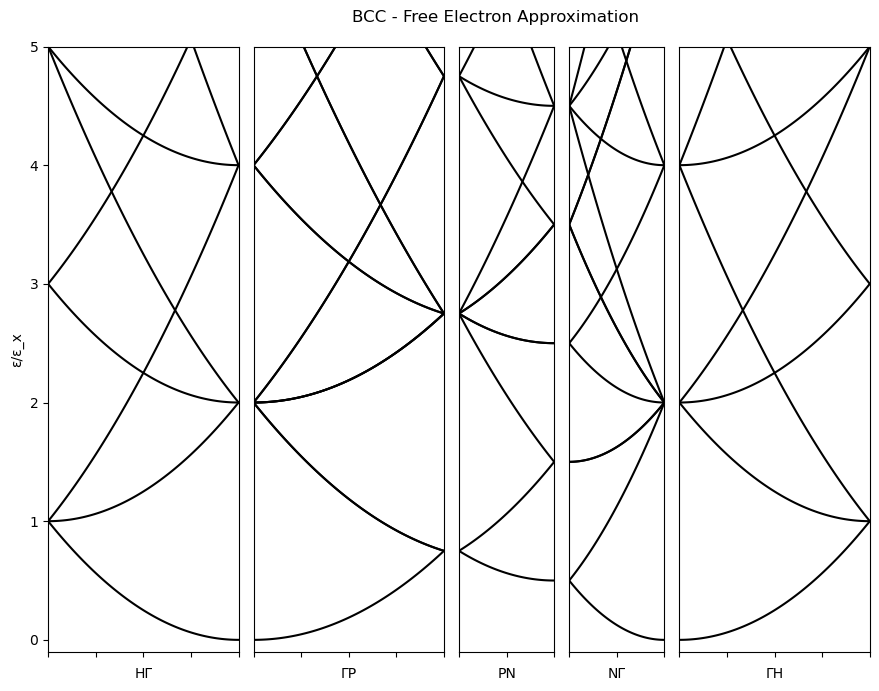

In [216]:
miller = Miller(['000','100','110','111','200','220','222'])

#HΓ - BCC
mu = np.linspace(-1,0,100)
indices_HΓ, En_HΓ, df_HΓ = main(miller=miller,
                                k1=0, k2=0, k3=mu, mu=mu,
                                lattice_name='BCC',k_name='HΓ',
                                Display=False,Half_zone=False,zone_table=False)

#ΓP - BCC
mu = np.linspace(0,1,100)
indices_ΓP, En_ΓP, df_ΓP = main(miller=miller,
                                k1=mu/2,k2=mu/2,k3=mu/2,mu=mu,
                                lattice_name='BCC',k_name='ΓP',
                                Display=False,Half_zone=False,zone_table=False)


#PN - BCC
mu = np.linspace(0,1,100)
indices_PN, En_PN, df_PN = main(miller=miller,
                                k1=(1-mu)/2, k2=(1-mu)/2+mu/2, k3=(1-mu)/2+1/2*mu, mu=mu,
                                lattice_name='BCC',k_name='PN',
                                Display=False,Half_zone=False,zone_table=False)


#NΓ - BCC
mu = np.linspace(-1/2,0,100)
indices_NΓ, En_NΓ, df_NΓ = main(miller=miller,
                                k1=0, k2=mu, k3=mu, mu=mu,
                                lattice_name='BCC',k_name='ΓN',
                                Display=False,Half_zone=False,zone_table=False)




#ΓH - BCC
mu = np.linspace(0,1,100)
indices_ΓH, En_ΓH, df_ΓH =  main(miller=miller,
                                k1=0, k2=0, k3=mu, mu=mu,
                                lattice_name='BCC',k_name='ΓH',
                                Display=False,Half_zone=False,zone_table=False)


#NH- BCC
mu = np.linspace(0,1,100)
indices_NH, En_NH, df_NH = main(miller=miller,
                                k1=0, k2=(1-mu)/2, k3=(1-mu)/2+mu, mu=mu,
                                lattice_name='BCC',k_name='NH',
                                Display=False,Half_zone=False,zone_table=False)




fig = pl.figure(figsize=(10, 7))

gs = gridspec.GridSpec(1, 6, width_ratios=[2, 2,1,1,2,1])


#HΓ
ax1=subplot(gs[0])
Plot(En_HΓ,np.linspace(-1,0,100),ax1)
ax1.set_xticklabels(()) 
ax1.set_ylabel('ε/ε_x')
ax1.set_xlabel('HΓ')
ylim( -0.1 ,5 ) ; xlim(-1,0)

#ΓP
ax=subplot(gs[1])

Plot(En_ΓP,np.linspace(0,1,100),ax)
ax.set_xlabel('ΓP')
plt.ylim( -0.1 ,5 )  ; plt.xlim(0,1); ax.set_xticklabels(()) ; ax.set_yticks([])

#PN
ax=subplot(gs[2])

Plot(En_PN,np.linspace(0,1,100),ax)
ax.set_xlabel('PN')
plt.ylim( -0.1 ,5 )  ; plt.xlim(0,1); ax.set_xticklabels(()) ; ax.set_yticks([])

#NΓ
ax=subplot(gs[3])
Plot(En_NΓ,np.linspace(-1/2,0,100),ax)
ax.set_xlabel('NΓ')
ylim( -0.1 ,5 )  ; xlim(-1/2,0);ax.set_xticklabels(()) ; ax.set_yticks([])

#ΓH
ax=subplot(gs[4])
Plot(En_ΓH,np.linspace(0,1,100),ax)
ax.set_xlabel('ΓH')
plt.ylim( -0.1 ,5 ) ; plt.xlim(0,1) ; ax.set_xticklabels(()) ; ax.set_yticks([])



fig.suptitle('BCC - Free Electron Approximation')
fig.tight_layout(w_pad=-50,h_pad=-20)
plt.show()